# Lab 2
## Problem 1
#### Part A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

x = 4 (cosmic ray background)
y = 7 (signal)

Text(0.5, 1.0, 'Sums of 10 Days, not normalized')

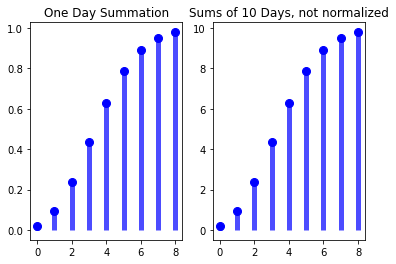

In [104]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import math

mu = 4
x = np.arange(poisson.ppf(0.01, mu),
        poisson.ppf(0.99, mu))
fig, (ax1, ax2) = plt.subplots(1, 2)

pois_sum = poisson.pmf(x, mu)
for i in range(pois_sum.size - 1):
    pois_sum[i + 1] = pois_sum[i] + pois_sum[i + 1]

ax1.plot(x, pois_sum, 'bo', ms=8, label='poisson pmf')
ax1.vlines(x, 0, pois_sum, colors='b', lw=5, alpha=0.7)
ax1.set_title("One Day Summation")
ax2.plot(x, pois_sum * 10, 'bo', ms=8, label='poisson pmf')
ax2.vlines(x, 0, pois_sum * 10, colors='b', lw=5, alpha=0.7)
ax2.set_title("Sums of 10 Days, not normalized")

#### Part B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.
Adding multiple Poisson distributions together resulting in another Poisson distribution makes sense because all the components are identical Poisson distributions, so the result should also be a Poisson distribution with higher values but identical shape.

Text(0.5, 1.0, 'Sums of 5 Days, Not Normalized, Still a Poisson Distribution')

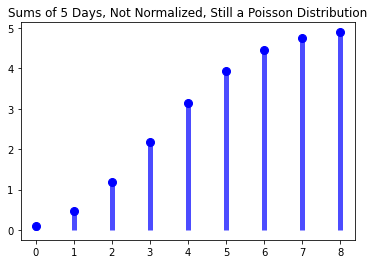

In [105]:
plt.plot(x, pois_sum * 5, 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, pois_sum * 5, colors='b', lw=5, alpha=0.7)
plt.title("Sums of 5 Days, Not Normalized, Still a Poisson Distribution")

#### Part C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

Text(0.5, 1.0, 'Averages Over 1000 Days')

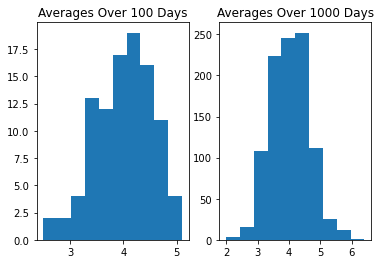

In [106]:
averages100 = []
averages1000 = []
for i in range(100):
    dist = np.random.poisson(mu, 10)
    averages100.append(sum(dist) / len(dist))
for i in range(1000):
    dist = np.random.poisson(mu, 10)
    averages1000.append(sum(dist) / len(dist))
    
    
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(averages100)
ax1.set_title("Averages Over 100 Days")
ax2.hist(averages1000)
ax2.set_title("Averages Over 1000 Days")

Differently from Part B's continuation as a Poisson distribution, the averages of many trials becomes more and more Gaussian as more trials are added, which matches the central limit theorem's statement that the averages of independent random variables tend towards a Gaussian even if the original distribution is not Gaussian

#### Part D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. \[In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]


In [218]:
from scipy.special import erfinv
N = 4
y = 7
x = poisson.cdf(mu * y,mu * N)
print("Sigma of observation is: " + str(erfinv(x)*2**0.5))

Sigma of observation is: 3.063373083090288


## Problem 2
#### Choosing Rayleigh distribution
#### Part A) Show how the distribution changes as you average over more observing intervals.


Text(0.5, 1.0, 'Averages Over 50 Days')

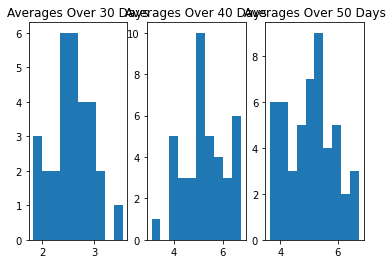

In [161]:
averages30 = []
averages40 = []
averages50 = []
for i in range(30):
    dist = np.random.rayleigh(2, 10)
    averages30.append(sum(dist) / len(dist))
for i in range(40):
    dist = np.random.rayleigh(mu, 10)
    averages40.append(sum(dist) / len(dist))
for i in range(50):
    dist = np.random.rayleigh(mu, 10)
    averages50.append(sum(dist) / len(dist))
    
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(averages30)
ax1.set_title("Averages Over 30 Days")
ax2.hist(averages40)
ax2.set_title("Averages Over 40 Days")
ax3.hist(averages50)
ax3.set_title("Averages Over 50 Days")

#### Part B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?
The shape gets closer to a Gaussian as more days are added, approaching one after 40-50 intervals.

## Problem 3
#### Version 1

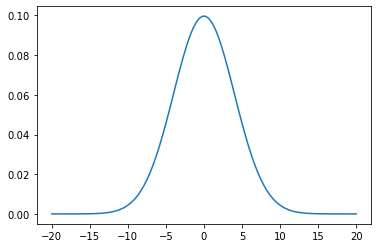

Significance is: 5.964232538868282 sigma so I can claim a discovery.


In [240]:
from scipy.stats import norm
# Gaussian standard deviation

mu = 0
sigma = 4
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

sigma = 4
# Signal strength
y = 23.4
prop = norm.cdf(23.4,0,4)
print("Significance is: " + str(erfinv(prop)*2**0.5) + " sigma so I can claim a discovery.")

#### Version 2
#### Part B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)
If there is no signal to be found, we expect the background to follow a zero-mean Gaussian distribution with a standard deviation of 4, multiplied by 10000 trials. What is the probability that such a background produced a signal of 23.4 strength or higher?

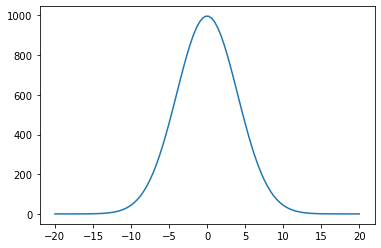

In [227]:
mu = 0
sigma = 4
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * 10000)
plt.show()

#### Part C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [232]:
sigma = 4
y = 23.4
prop = (1 - (1 - norm.cdf(23.4,0,4)) * 10000)
print("Significance is: " + str(erfinv(prop)*2**0.5) + " sigma so I can not claim a discovery.")

Significance is: 4.218634346128136 sigma so I can not claim a discovery.


## Problem 4
#### Part A) Calculate the signal required for a 5-sigma detection in Version 1
20, as sigma was equal to 4 and no additional trials were conducted.
#### Part B) Calculate the signal required for a 5-sigma detection in Version 2

In [239]:
from scipy.special import erf
print("Signal required for 5-sigma detection in Version 2 is " + str(norm.ppf((1 - (1 - erf(5)) / 10000), 0, sigma)))

Signal required for 5-sigma detection in Version 2 is 32.83814460640555


#### Part C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.
The signal must be around 13 brighter, or around a factor of 1.6. The factor is so low because the probability decreases towards 0 asymptotically, and therefore doesn't take long to shrink the distance between the probability distribution and the base line by a factor or even several factors of 10.
#### Part D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?
The effect would likely be logarithmic or similar, in that increasing the trials factor by an order of magnitude will only increase the 5-sigma sensitivity threshold by around 3 or 4, rather than by a significant factor.
